# Regresión Lineal


En este notebook vamos a ir construyendo las funciones que nos permiten hacer regresión lineal y las aplicaremos a casos sencillos.

In [22]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

### Precauciones.

Ten cuidado con las dimensiones de los vectores y matrices con los que trabajas. Asegurate de que mantienes la coherencia en las operaciones matriciales. No es lo mismo trabajar con un vector de dimensiones `(n_shape, )` que con un vector `(n_shape, 1)`.

En `sklearn` la manera habitual de trabajar es:
   * X → siempre 2D (n_samples, n_features)
   * y → normalmente 1D (n_samples,), no columna

Muchos errores vienen de usar `y.reshape(-1,1)` cuando el modelo espera un vector 1D.

Si tu código no emplea `sklearn` asegurate de que la elección que hagas se mantenga después de cada operación. 

#### Control de dimensiones en NumPy: `reshape()`, `ravel()` y `flatten()`

Cuando trabajamos con operaciones algebraicas vectorizadas (producto matricial, broadcasting, descenso de gradiente, etc.), **controlar la forma (`shape`) de los arrays es fundamental**.

Recordatorio:
- `(n,)` → vector 1D (sin orientación explícita)
- `(n,1)` → vector columna
- `(1,n)` → vector fila
- `(n,m)` → matriz

   - `reshape()`: Permite cambiar la forma del array **sin modificar los datos**.
   - `ravel()`: Convierte un array en un vector 1D.
       ``` python
        A = np.array([[1,2],[3,4]])
        A.ravel()   # → array([1,2,3,4])
        ```
   - `flatten()`: También convierte a 1D pero **crea una copia de los datos** (menos eficiente pero más seguro)
       ``` python
        A = np.array([[1,2],[3,4]])
        A.flatten()   # → array([1,2,3,4])
        ```

## Ecuación Normal.

Empezamos con la ecuación normal:
$$
\boldsymbol{X}^T\boldsymbol{X}\Theta  - \boldsymbol{X}^TY = 0
$$

Primero programamos dos funciones:

* `normal_equation()`: A partir de los datos de entrada guardados en una matriz $X$ (sin la columna de 1's) y las etiquetas en el vector $Y$ calcula los coeficientes $\Theta$.
* `predicted()`: Una vez conocidos los coeficientes, devuelve la predicción dado un conjunto de datos de entrada.

In [23]:
def normal_equation(X,y):
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    y: Vector con las imagenes de los datos de entrada conocidas. 

    Resuelvo la ecuación normal (X^T)X Theta = (X^T)Y
    Return Theta: vector de coeficientes de la regresión lineal
    """
    n_samples, n_features = X.shape

    # El primer paso será añadir la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda
    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    # Construye la matriz (X^T)X y el vector (X^T)Y donde X es la matriz amplida con la columna de 1's

    #***** TU CODIGO AQUI ********* (2 líneas)
    A = X_1.T@X_1
    B = X_1.T@y
    #***** TU CODIGO AQUI *********

    # Resuelve el sistema lineal (X^T)X Theta = (X^T)Y usando la función adecuada de numpy

    #***** TU CODIGO AQUI ********* (1 línea)
    Theta =  np.linalg.inv(A)@B
    #***** TU CODIGO AQUI *********  
     
    return Theta

def predicted(X, Theta): # le pasa el conjunto de datos de entrada, vector theta calculado en normal ecuation y devuelve las predicciones
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    Theta: vector de coeficientes Theta que devuelve la ecuación normal

    Return Y_hat = X Theta
    """
    n_samples, n_features = X.shape
    # El primer paso será añadir la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    v = np.ones((X.shape[0],1))
    #***** TU CODIGO AQUI ********* (1 línea)
    X_1 = np.column_stack((v,X))
    #***** TU CODIGO AQUI *********

    # Calcula el vector de predicciones asociado a los datos de entrada Y=X Theta siendo X es la matriz amplida con la columna de 1's
    
    #***** TU CODIGO AQUI ********* (1 línea)
    Y_hat = X_1@Theta
    #***** TU CODIGO AQUI *********
  
    return  Y_hat

### Ejemplos a resolver:
* #### Salarios:
  Problema con 1 variable predictora (Años de experiencia) y una a predecir (Salario)
      
* #### Caso sintético de Sklearn:
  Problema con 500 datos multivariables con 4 variables predictoras.

#### 1. Salario vs Años de Experiencia

Datos de entrada:

In [24]:
# Cargamos los datos desde el fichero CSV.
# Modifica la ruta si lo necesitas

datos = pd.read_csv('Archivos/Salary_Data.csv')
datos.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<function matplotlib.pyplot.show(close=None, block=None)>

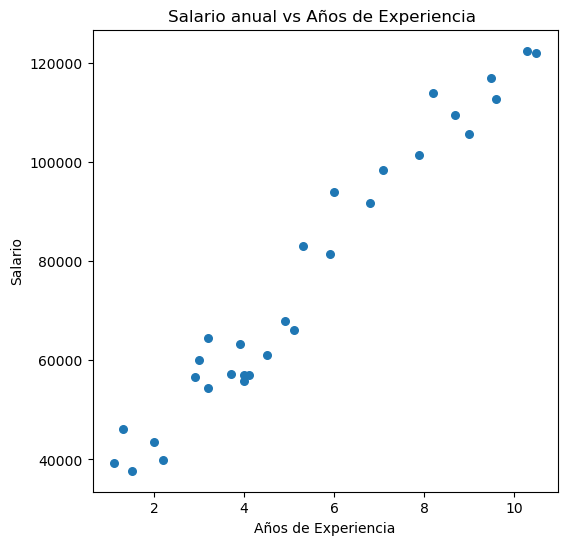

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(datos['YearsExperience'],datos['Salary'],s=30)
plt.xlabel('Años de Experiencia')  # Set the label for x-axis
plt.ylabel('Salario')  # Set the label for y-axis
plt.title('Salario anual vs Años de Experiencia ')  # Set the title of the plot
plt.show

A continuación vamos a ir paso a paso resolviendo el problema:

* Calculamos los coeficientes de la regresión lineal $\Theta$ llamando a la función `normal_equation()`


In [26]:
X = datos['YearsExperience'].to_numpy().reshape(-1,1) # Convierte la serie en un vector columna
y = datos['Salary'].to_numpy()                        # Convierte la serie en un vector (n_shape,)

#***** TU CODIGO AQUI ********* (1 línea)
Theta = normal_equation(X,y)
#***** TU CODIGO AQUI ********* 

print(Theta)

[25792.20019867  9449.96232146]


*  Probamos el modelo en un vector que contiene 6 datos nuevos (años de experiencia). Para ello llamamos a la función `predicted()` 

In [27]:
X_test = np.random.uniform(0,12,(6,1))

#***** TU CODIGO AQUI ********* (1 línea)
Y_pred = predicted(X_test,Theta)
#***** TU CODIGO AQUI *********

print(Y_pred)

[ 66170.71855731  27120.5664209  101461.19089631 100241.28249371
  86800.9225748   34908.46027625]


* Representamos gráficamente los puntos originales, los puntos de prueba y la recta de regresión calculada

*Precaución* Si falla el código asegurate de que `Y_pred` es un vector de la forma `(n_shape,)` 

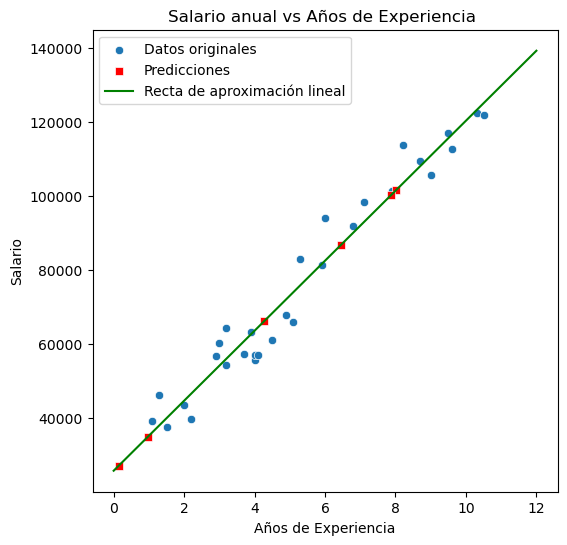

In [28]:
X_i = np.linspace(0,12,200).reshape((200,1))
plt.figure(figsize=(6,6))
# Puntos de entrenamiento
sns.scatterplot(x=datos['YearsExperience'],y=datos['Salary'], marker="o", label='Datos originales')
# Puntos de prueba
sns.scatterplot(x=X_test[:,0],y=Y_pred[:], color="r",marker="s", label='Predicciones')
# Recta de regresión
sns.lineplot(x=X_i[:,0], y=predicted(X_i, Theta)[:], color='green', label='Recta de aproximación lineal')
plt.xlabel('Años de Experiencia')  # Set the label for x-axis
plt.ylabel('Salario')  # Set the label for y-axis
plt.title('Salario anual vs Años de Experiencia ')  # Set the title of the plot
plt.show()

### 2. Caso SKlearn

En la libreria `Scikit-Learn` existen funciones para generar conjuntos de datos de forma artificial que utilizar para validar nuestros modelos.
Vamos a empezar con un caso de regresión lineal con 500 datos cada uno de ellos con 4 variables de entrada.

* Cómo interpretar el parámetro `noise=20`:
Noise añade ruido gaussiano a las salidas del modelo lineal generado. En este caso, el ruido sigue una distribución normal con una desviación estándar de 20.
Esto significa que, en promedio, los valores de y generados estarán desviados por alrededor de 20 unidades respecto a la verdadera relación lineal subyacente.

* MSE esperado
Un MSE esperable debería estar aproximadamente alrededor de la varianza del ruido introducido. Dado que especificaste noise=20, la varianza del ruido sería $20^2=400$. Esto te da una referencia de cuál sería el MSE mínimo esperable, ya que el modelo lineal tratará de capturar la relación subyacente, pero no podrá reducir el error por debajo del nivel de ruido introducido.

In [29]:
X, y = datasets.make_regression(n_samples=500, n_features=4, noise=20, random_state=4)

n_samples, n_features = np.shape(X)

#### División en Train/test

Lo primero que haremos será dividir el conjunto de datos de entrada en dos subconjuntos. Uno que llamaremos `Train` lo usaremos para crear el modelo lineal. El resto de datos de entrada formarán el `Test`, desconocido para el modelo, que emplearemos para ver como de bien aproxima el modelo.

In [30]:
n_train = int(0.8*n_samples) # 80% para entrenar
order = list(range(n_samples))
np.random.shuffle(order)

X_shuffle = X[order,:]
y_shuffle = y[order]

X_train = X_shuffle[:n_train, :]
y_train = y_shuffle[:n_train] 

X_test  = X_shuffle[n_train:, :]
y_test  = y_shuffle[n_train:]

A continuación vamos a ir paso a paso resolviendo el problema:

* Calculamos los coeficientes de la regresión lineal $\Theta$ llamando a la función `normal_equation()` sobre el conjunto de datos de entrenamiento.

In [31]:

#***** TU CODIGO AQUI ********* (1 línea)
Theta = normal_equation(X_train,y_train)
#***** TU CODIGO AQUI ********* 

print(Theta)

[-0.29033687 52.86387825 92.75521372  5.55015562 85.0057942 ]


*  Probamos el modelo en los datos de test. Para ello llamamos a la función `predicted()` 

In [32]:
#***** TU CODIGO AQUI ********* (1 línea)
y_pred = predicted(X_test,Theta)
#***** TU CODIGO AQUI ********* 

* Calculamos el MSE cometido en el conjunto de datos de test. Para ello implementa:
$$
J(\Theta) = \frac{1}{m} \sum_{j=1}^m (\hat{y}^j-y^j)^2 
$$
Intenta vectorizar la operación lo más posible. `y_pred` e `y_test` son vectores de la misma longitud. Puedes operar elemento a elemento para calcular $(\hat{y}^j-y^j)^2 $ y sumar las componentes del vector resultado.

In [33]:
# Calculo del error


#***** TU CODIGO AQUI ********* (1 línea)
m=X_train.shape[0]
mse_test = (1/m)*np.sum((y_pred-y_test)**2)

#***** TU CODIGO AQUI ********* 

print(mse_test)

91.65465235518597


* Por último representamos graficamente las predicciones frente a los valores reales. El error en cada dato es lo que se desvía de la diagonal.

<function matplotlib.pyplot.show(close=None, block=None)>

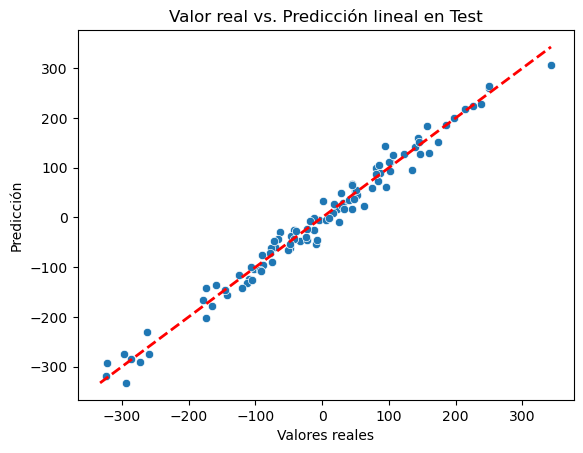

In [34]:
sns.scatterplot(x=y_test,y=y_pred)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo para la diagonal
max_val = max(y_test.max(), y_pred.max())  # Valor máximo para la diagonal
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Línea ideal (y=x)")
plt.xlabel('Valores reales')
plt.ylabel('Predicción')
plt.title('Valor real vs. Predicción lineal en Test')
plt.show

## Descenso de Gradiente.


Vamos ahora a implementar la función que halle los coeficientes de la regresión usando descenso de gradiente:

$$
\Theta^{k+1} = \Theta^k - \alpha\left( \boldsymbol{X}^T\boldsymbol{X}\Theta^k  - \boldsymbol{X}^TY\right)
$$

Para ello programaremos la función: `batch_gradient_descent(X,y,learning_rate = 0.0001, n_iters = 100)` que devuelve los pesos $\Theta$ dados:

* `X`: Matriz de datos de entrada $\boldsymbol{X}$.
* `y`: Vector de etiquetas $Y$ para esos datos de entrada.
* `learning_rate`: tasa de aprendizaje $\alpha$.
* `n_iters`: número de iteraciones del descenso de gradiente. Se suele llamar *épocas* o `epochs`.

In [35]:
def batch_gradient_descent(X,y,learning_rate = 0.001, n_iters = 100):
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    y: Vector con las imagenes de los datos de entrada conocidas.
    learning_rate: Tasa de aprendizaje. Por defecto 0.0001
    n_iters: Numero de iteraciones o épocas del proceso iterativo. Por defecto 100 

    Evaluo n_iters:
        Theta^k+1 = Theta^k - learning_rate (2/m)(X^T(X Theta^k- Y)) 
    partiendo de un Theta^0 aleatorio
    
    Return Theta: vector de coeficientes de la regresión lineal
    """    
    n_samples, n_features = X.shape

    # Empezamos con un valor aleatorio Theta_0.
    # Puedes usar la función Theta = np.random.randn(n_features+1) * 0.01 
    # O desde numpy 1.17: 
    # rng = np.random.default_rng(seed=42)
    # Theta = rng.standard_normal(n_features+1) * 0.01 

    #***** TU CODIGO AQUI ********* (1 línea)
    # Theta = 
    #***** TU CODIGO AQUI ********* 

    # A continuación añadimos la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    #***** TU CODIGO AQUI ********* (1 línea)
    # X_1 =
    #***** TU CODIGO AQUI *********
  
    # Iteramos por las epochs
    for _ in range(n_iters):

        # Implementa la operación matricial X^T(X Theta^k- Y)

        #***** TU CODIGO AQUI ********* (1-2 línea)
        # 
        #
        #***** TU CODIGO AQUI ********* 

        # Actualiza el valor de Theta
        #***** TU CODIGO AQUI ********* (1 línea)
        # Theta = 
        #***** TU CODIGO AQUI ********* 

    return Theta

IndentationError: expected an indented block after 'for' statement on line 36 (976171163.py, line 50)

### Ejemplo a resolver:
#### Caso sintético de Sklearn:

Mismo problema con 500 datos multivariables con 4 variables predictoras.


#### División en Train/test

Ya tenemos el caso preparado puesto que lo resolvimos con las **ecuación normal**.
En esta ocasión para hacer la división entre *Train* y *Test* utilizo la función `train_test_split` del módulo `sklearn.model_selection` en lugar de hacer la división nosotros

In [ ]:
from sklearn.model_selection import train_test_split

X, y = datasets.make_regression(n_samples=500, n_features=4, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6543)

#### Cálculo de coeficientes de la regresión $\Theta$

Vamos a calcular los coeficientes usando tanto la **Ecuación Normal** (ya lo hicimos) como **Descenso de gradiente**. 

Los tiempos de cálculo no van a ser muy relevantes pues el caso que estamos probando es pequeño y el descenso de gradiente no va a suponer una mejora.

Juega con los valores de `learning_rate` y `n_iters` para que los coeficientes sean *iguales*.

In [ ]:
import time

# Coeficientes calculados con la ecuacion normal
start_time = time.time()

#***** TU CODIGO AQUI ********* (1 línea)
# Theta_normal = 
#***** TU CODIGO AQUI *********

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cálculo de coeficientes en ecuaciones normales: {elapsed_time:.5f} segundos")
print(Theta_normal)

# Coeficientes calculados con descenso de gradiente
start_time = time.time()

#***** TU CODIGO AQUI ********* (1 línea)
# Theta_gradient = 
#***** TU CODIGO AQUI ********* 

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo de cálculo de coeficientes en descenso de gradiente: {elapsed_time:.5f} segundos")
print(Theta_gradient)

#### Predicción sobre los datos de test.

Solamente vamos a trabajar con los coeficientes devueltos por el método de *descenso de gradiente*.


In [ ]:
#***** TU CODIGO AQUI ********* (1 línea)
# y_pred =
#***** TU CODIGO AQUI ********* 

In [ ]:
# Calculo del error

#***** TU CODIGO AQUI ********* (1 línea)
# mse_test = 
#***** TU CODIGO AQUI ********* 

print(mse_test)

* Por último representamos graficamente las predicciones frente a los valores reales.

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo para la diagonal
max_val = max(y_test.max(), y_pred.max())  # Valor máximo para la diagonal
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Línea ideal (y=x)")
plt.xlabel('Valores reales')
plt.ylabel('Predicción')
plt.title('Valor real vs. Predicción lineal en Test')
plt.show

## Regresión Polinómica.

Vamos a generar un conjunto de datos en el intervalo $[-2, 2]$ a partir del polinomio

$ f(x) = 3x^5 - 2x $

El *dataset* estará formado por 30 puntos de la forma $X = \{(x_i, f(x_i) + \epsilon) \}$ donde $\epsilon$ será una variable aleatoria que tomará valores en el intervalo $[-\frac{\text{max}(f(x))}{10},\frac{\text{max}(f(x))}{10}]$

Pretendemos que el modelo sea capaz de inferir que la dinámica que está representando sea el polinomio $ y_{pred}(x) = 3x^5 - 2x $.

In [ ]:
# generamos un conjunto de datos en el intervalo [-2,2]
a = -2.
b = 2.
n_points = 30
x_i = np.random.rand(n_points)*(b-a) + a

# generamos sus imagenes a partir de la función y(x) = 3*x^5 -2*x + ruido 
# El ruido lo genero normalmente distribuido entre 
y_x = 3*x_i**5 -2*x_i
max_val = max(abs(y_x))

ruido = np.random.normal(-(max_val)/10, max_val/10, n_points)
y_i = y_x + ruido

# Representamos los puntos iniciales
plt.scatter(x_i, y_i)
    
plt.title('Puntos iniciales')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(a, b)

#### Dividimos el conjunto inicial en *Train/Test*

Tomamos 12 puntos como conjunto de datos de entrenamiento. 

In [ ]:
# Divido en training y test
n_train = 12
n_test = n_points-n_train
order = list(range(len(x_i)))
np.random.shuffle(order)

x_train = np.array([x_i[i] for i in order[0:n_train]])
y_train = np.array([y_i[i] for i in order[0:n_train]])

x_test = np.array([x_i[i] for i in order[n_train:]])
y_test = np.array([y_i[i] for i in order[n_train:]])


# Representamos los puntos iniciales
sns.scatterplot(x=x_i,y=y_i,  marker = 'o' , edgecolor='blue', facecolor='none', label= 'Puntos originales', s= 40 )
sns.scatterplot(x=x_train,y=y_train,  marker = 'o' , color = 'red', label= 'Puntos entrenamiento', s= 20 )
sns.scatterplot(x=x_test,y=y_test,  marker = 'o' , color = 'black', label= 'Puntos test', s= 20 )

plt.title('Puntos ')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(a, b)

La manera en que vamos a calcular el polinomio de regresión de un determinado orden $p$ va a ser generar la matriz de datos sabiendo que sus columnas son potencias de orden creciente del vector con los datos originales:

$$
\boldsymbol{X} = \begin{pmatrix}
 x_1 & x_1^2 & \dots & x_1^p\\
 x_2 & x_2^2 & \dots & x_2^p\\
\vdots & \vdots & \dots & \vdots\\
 x_m & x_m^2 & \dots & x_m^p
\end{pmatrix}
$$

Esa matriz será el primer argumento de entrada en la función `normal_equation()` 

#### Cálculo de coeficientes de la regresión $\Theta$

Vamos a calcular los coeficientes usando la **Ecuación Normal**. 

Para ello, antes de llamar a las ecuaciones genera la matriz X_train  (X mayúscula) a partir del  vector x_train  calculado en la celda anterior  

In [ ]:
p = 5 # Orden polinómico

#***** TU CODIGO AQUI ********* 
# X_train = 
#***** TU CODIGO AQUI *********


*  Calculamos ahora los coeficientes del polinomio de regresión

In [ ]:
#***** TU CODIGO AQUI ********* (1 línea)
# Theta = 
#***** TU CODIGO AQUI *********
print(Theta)

¿Se parecen a los del polinomio buscado? ¿Por qué?

#### Dibujar el polinomio resultante 

Vamos a implementar una función de nombre `polinomio` que dado un vector de coeficientes de tamaño $p+1$ y conjunto de puntos $\boldsymbol{x}$ devuelva el vector: 
$$
h_\Theta(\boldsymbol{x}) = \theta_0  + \theta_1 \boldsymbol{x} + \theta_2 \boldsymbol{x}^2 + \theta_3 \boldsymbol{x}^3 +  \dots +  \theta_p \boldsymbol{x}^p
$$

In [ ]:
def polinomio(Theta, x):

    #***** TU CODIGO AQUI *********
    
    
    #***** TU CODIGO AQUI *********

    return imagen

x_value = np.linspace(a,b,300)
y_value = polinomio(Theta,x_value)

# Representamos los puntos iniciales
sns.lineplot(x=x_value,y=y_value, label= 'Polinomio de grado ' +str(p) )
sns.scatterplot(x=x_train,y=y_train,  marker = 'o' , color = 'red', label= 'Puntos entrenamiento', s= 20 )
sns.scatterplot(x=x_i,y=y_i,  marker = 'o' , edgecolor='blue', facecolor='none', label= 'Puntos originales', s= 40 )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polinomio aproximador')

## Regularización.

De momento solo vamos a implementar la ecuación normal modificada para el caso de **Ridge** donde la función de error toma la forma:

$$
J(\Theta) = \dfrac{1}{m} \displaystyle\sum_{j=1}^m (h_\Theta(\boldsymbol{x^j})-y^j)^2 + \dfrac{\lambda}{m} \displaystyle\sum_{i=1}^{n} \theta_i^2 
$$

y la ecuación normal se escribe como:
$$
\left(X^TX +\lambda D\right)\Theta = X^T Y  \text{   con }
$$

$$
D = \begin{pmatrix}
0 & 0 & 0 & \dots & 0\\
0 & 1 & 0 & \dots & 0\\
0 & 0 & 1 &  \dots & 0\\
\vdots & \vdots &  & \dots & \vdots\\
0 & 0 & 0 & \dots & 1
\end{pmatrix} 
\hspace{0.5cm}
D \in \mathbb{M}^{(n+1)\times(n+1)}(\mathbb{R})
$$


Implementaremos una función:

* `normal_equations_ridge(X, y, alpha = 1.)`: Pensada para el caso de regresión lineal con un conjunto de `m` datos de entrada con `n` características siendo `alpha` el coeficiente de regularización ($\lambda$ en la ecuación).

In [ ]:
def normal_equations_ridge(X, y, alpha = 1.):
    """
    X: el conjunto de datos de entrada en la matriz X(m,n)
        m: número de datos. 
        n: número de variables predictoras o atributos.
    y: Vector con las imagenes de los datos de entrada conocidas. 
    alpha: coeficiente de regularización

    Resuelvo la ecuación normal [(X^T)X + alpha*D] Theta = (X^T)Y
    Return Theta: vector de coeficientes de la regresión lineal
    """

    n_samples, n_features = X.shape
    
    # Construcción de la matriz de regularización D

    #***** TU CODIGO AQUI ********* (2 líneas)
    # D = 

    #***** TU CODIGO AQUI *********


    # A continuación añadimos la columna de 1's a los datos
    # Puedes usar la funcion de numpy np.column_stack((v,M)) que añade v como columna de M a la izquierda

    #***** TU CODIGO AQUI ********* (1 línea)
    
    #***** TU CODIGO AQUI *********

    # Construye la matriz (X^T)X + alpha*D y el vector (X^T)Y donde X es la matriz amplida con la columna de 1's

    #***** TU CODIGO AQUI ********* (2 líneas)
    

    #***** TU CODIGO AQUI *********

    # Resuelve el sistema lineal [(X^T)X + alpha*D] Theta = (X^T)Y usando la función adecuada de numpy

    #***** TU CODIGO AQUI ********* (1 línea)
    # Theta =  
    #***** TU CODIGO AQUI *********
    
    return Theta

### Generar datos donde veamos el efecto de la *Regularización*.

Vamos a generar una matriz de datos con 100 muestras y 4 características. Para ver el efecto de la regularización las dos últimas características estarán fuertemente correlacionadas con las dos primeras.
 

In [ ]:
# Generar un dataset con 32 variables originales y 100 muestras
X, y = datasets.make_regression(n_samples=100, n_features=2, noise=10, random_state=12)

# Inducir colinealidad añadiendo variables dependientes de las originales  
U = (0.95 * X[:, 0] + 0.05 * np.random.randn(100)).reshape((100,1))  # Fuerte correlación con X[:,0]
V = (0.95 * X[:, 1] + 0.01 * np.random.randn(100)).reshape((100,1))  # Fuerte correlación con X[:,1]

X = np.column_stack((X, U, V))
X.shape


#### Normalización de los datos

Antes de hacer la división en *Train* y *Test* normalizo los datos de entrada.

Vamos a aplicar *Standard Scaler* a cada variable 
$$
X_{\text{normalized}} = \dfrac{X-\mu}{\sigma}
$$
siendo $\mu$ la media y $\sigma$ la desviación estandar.

In [ ]:
# Normalizamos los datos usando Standard Scaler

# Paso 1: Calcula la media y la desviación estándar de cada columna de X

#***** TU CODIGO AQUI ********* (2 líneas)
# mean =
# std = 
#***** TU CODIGO AQUI ********* 

# Paso 2: Normaliza los datos usando broadcasting

#***** TU CODIGO AQUI ********* (1 línea)
# X_normalized = 
#***** TU CODIGO AQUI ********* 

####  Dividimos en *Train* y *Test*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=6543)

#### Cálculo de los coeficientes de la regresión

Vamos a calcular los coeficientes usando y sin usar la regularización para ver su efecto.

In [ ]:
# Usa la ecuación normal para hallar los coeficientes sin regularizar

#***** TU CODIGO AQUI ********* (1 línea)
# Theta_normal = 
#***** TU CODIGO AQUI ********* 

# Usa la ecuación normal con regularización de Ridge para hallar los coeficientes

#***** TU CODIGO AQUI ********* (1 línea)
# Theta_ridge = 
#***** TU CODIGO AQUI *********


* Comparamos los coeficientes

In [ ]:

# **Imprimir coeficientes**
print("Coeficientes sin regularización:", Theta_normal)
print("Coeficientes con Ridge:", Theta_ridge)

# **Visualización**
labels = ["Intercepto", "X1", "X2", "X3" , "X4"]
x_pos = np.arange(len(labels))

plt.bar(x_pos - 0.2, Theta_normal, width=0.4, label="Regresión lineal", color="blue")
plt.bar(x_pos + 0.2, Theta_ridge, width=0.4, label="Ridge", color="green")
plt.xticks(x_pos, labels)
plt.ylabel("Valor de los coeficientes")
plt.title("Comparación de coeficientes con y sin Ridge")
plt.legend()
plt.show()


#### Predicción en el conjunto de *Test*

In [ ]:
#***** TU CODIGO AQUI ********* (2 línea)
# y_pred_ridge  = 
# y_pred_normal =
#***** TU CODIGO AQUI ********* 

#### Error sin y con Regularización.

In [ ]:
# Calculo del error

#***** TU CODIGO AQUI ********* (2 línea)
# mse_test_normal = 
# mse_test_ridge  = 
#***** TU CODIGO AQUI ********* 

print(mse_test_normal)
print(mse_test_ridge)

* Por último representamos graficamente ambas predicciones frente a los valores reales.

In [ ]:
sns.scatterplot(x=y_test,y=y_pred_normal, color = 'b', label='Regresión sin regularización')
sns.scatterplot(x=y_test,y=y_pred_ridge, color = 'g', label='Regresión con regularización')
min_val = min(y_test.min(), y_pred_normal.min(), y_pred_ridge.min())  # Valor mínimo para la diagonal
max_val = max(y_test.max(), y_pred_normal.max(), y_pred_ridge.max())  # Valor máximo para la diagonal
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Línea ideal (y=x)")
plt.xlabel('Valores reales')
plt.ylabel('Predicción')
plt.title('Valor real vs. Predicción lineal en Test')
plt.show